In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1) Introduction to the Data set

In [3]:
# Read import-85.data.csv into a dataframe named "cars." Specify the column names.
cars = pd.read_csv('imports-85.data.csv', 
                   header = None,
                  names = ['symboling', 'normalized_lossed', 'make', 'fuel_type',
                          'aspiration', 'num_doors', 'body_style', 'drive_wheels',
                          'engine_location', 'wheel_base', 'length', 'width',
                          'height', 'curb_weight', 'engine_type', 'num_cylinders',
                          'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
                          'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])

cars.head()

,symboling,normalized_lossed,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Investigate the column types and determine which ones can be used as features and which one is the target
print(cars.info())
# print(cars.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_lossed    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

There are no missing values. The columns describing features and the column regarding target are specified below.

In [5]:
num_cols = ['normalized_lossed','wheel_base', 'length', 'width', 'height', 'curb_weight', 
             'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg','price']

cars = cars[num_cols]

cars.head()

,normalized_lossed,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


***

### 2) Data Cleaning

#### Step 1: 

Use the DataFrame.replace() method to replace all of the "?" values with the numpy.nan missing value

In [6]:
cars = cars.replace(to_replace = '?', value = np.nan)

cars.head()

,normalized_lossed,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


#### Step 2: 

Because '?' is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. We can use either the DataFrame.astype() or the Series.astype() methods to convert column types.

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_lossed    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


##### Convert all columns to "float" type

In [8]:
cars = cars.astype('float')

# Double check 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_lossed    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [9]:
# Use column means to replace missing value
cars = cars.fillna(cars.mean())

# Double check
cars.isnull().sum()

normalized_lossed    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
# Normalize all columns except for the target column

price = cars['price']

cars = (cars - cars.min()) / (cars.max() - cars.min())

cars['price'] = price

cars.head()

,normalized_lossed,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


***
### 3) Univariate Model

+ Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
    + This function should split the data set into a training and test set.
    + Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    + Finally, it should calculate the RMSE and return that value.
+ Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
+ Modify the knn_train_test() function you wrote to accept a parameter for the k value.
    + Update the function logic to use this parameter.
    + For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def knn_train_test(features_cols, target_col, df):
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    df_new = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(df_new) / 2)
    
    # First half = training set and second half = test set
    train_df = df_new.iloc[0:last_train_row]
    test_df  = df_new.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
    knn.fit(train_df[[features_cols]], train_df[target_col])
    y_pred_test = knn.predict(test_df[[features_cols]])
    predictions = np.sqrt(mean_squared_error(y_true = test_df[target_col], y_pred = y_pred_test))
    return(predictions)

In [12]:
cars.columns

Index(['normalized_lossed', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [13]:
rmse_normalized_lossed = knn_train_test('normalized_lossed', 'price', cars)
print("1) RMSE for Univariate Model using 'normalized_lossed' is", rmse_normalized_lossed, "\n")

rmse_wheel_base = knn_train_test('wheel_base', 'price', cars)
print("2) RMSE for Univariate Model using 'wheel_base' is", rmse_wheel_base, "\n")

rmse_length = knn_train_test('length', 'price', cars)
print("3) RMSE for Univariate Model using 'length' is", rmse_length, "\n")

rmse_width = knn_train_test('width', 'price', cars)
print("4) RMSE for Univariate Model using 'width' is", rmse_width, "\n")

rmse_height = knn_train_test('height', 'price', cars)
print("5) RMSE for Univariate Model using 'height' is", rmse_height, "\n")

rmse_curb_weight = knn_train_test('curb_weight', 'price', cars)
print("6) RMSE for Univariate Model using 'curb_weight' is", rmse_curb_weight, "\n")

rmse_bore = knn_train_test('bore', 'price', cars)
print("7) RMSE for Univariate Model using 'bore' is", rmse_bore, "\n")

rmse_stroke = knn_train_test('stroke', 'price', cars)
print("8) RMSE for Univariate Model using 'Stroke' is", rmse_stroke, "\n")

rmse_compression_ratio = knn_train_test('compression_ratio', 'price', cars)
print("9) RMSE for Univariate Model using 'compression_ratio' is", rmse_compression_ratio, "\n")

rmse_horsepower = knn_train_test('horsepower', 'price', cars)
print("10) RMSE for Univariate Model using 'horsepower' is", rmse_horsepower, "\n")

rmse_peak_rpm = knn_train_test('peak_rpm', 'price', cars)
print("11) RMSE for Univariate Model using 'bore' is", rmse_peak_rpm, "\n")

rmse_city_mpg = knn_train_test('city_mpg', 'price', cars)
print("12) RMSE for Univariate Model using 'Stroke' is", rmse_city_mpg, "\n")

rmse_highway_mpg = knn_train_test('highway_mpg', 'price', cars)
print("13) RMSE for Univariate Model using 'highway_mpg' is", rmse_highway_mpg, "\n")

print("**Conclusion** The minimum RMSE for Univariate Model is the model using 'horsepower' as the sole feature.")

1) RMSE for Univariate Model using 'normalized_lossed' is 7176.70438403011 

2) RMSE for Univariate Model using 'wheel_base' is 7119.004207387687 

3) RMSE for Univariate Model using 'length' is 6485.2844605050595 

4) RMSE for Univariate Model using 'width' is 4172.770573916742 

5) RMSE for Univariate Model using 'height' is 7492.074066964035 

6) RMSE for Univariate Model using 'curb_weight' is 4614.650494978994 

7) RMSE for Univariate Model using 'bore' is 7402.539113957593 

8) RMSE for Univariate Model using 'Stroke' is 6873.510500378065 

9) RMSE for Univariate Model using 'compression_ratio' is 7580.764612227338 

10) RMSE for Univariate Model using 'horsepower' is 4334.14815699399 

11) RMSE for Univariate Model using 'bore' is 7387.04101317006 

12) RMSE for Univariate Model using 'Stroke' is 4921.718907393351 

13) RMSE for Univariate Model using 'highway_mpg' is 3843.203932147261 

**Conclusion** The minimum RMSE for Univariate Model is the model using 'horsepower' as the 

***
+ Modify the knn_train_test() function you wrote to accept a parameter for the k value.
    + Update the function logic to use this parameter.
    + For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def knn_train_test_updated(features_cols, target_col, k_list, df):
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    df_new = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(df_new) / 2)
    
    # First half = training set and second half = test set
    train_df = df_new.iloc[0:last_train_row]
    test_df  = df_new.iloc[last_train_row:]
    
    predictions_list = []
    for i in range(0,5):
        knn = KNeighborsRegressor(n_neighbors = k_list[i], algorithm = 'brute')
        knn.fit(train_df[[features_cols]], train_df[target_col])
        y_pred_test = knn.predict(test_df[[features_cols]])
        predictions = np.sqrt(mean_squared_error(y_true = test_df[target_col], y_pred = y_pred_test))
        predictions_list.append(predictions)
    return(predictions_list)

In [15]:
# rmse_highway_mpg = knn_train_test('highway_mpg', 'price', cars)
# RMSE for Univariate Model using 'Stroke' is 4695.9806585797205 

for i in range(1,14):
    name = cars.columns[i]
    rmse = knn_train_test_updated(cars.columns[i], 'price', [1,3,5,7,9], cars)
    rmse_name = print("rmse_" + name + "_updated for k = [1, 3, 5, 7, 9]: \n" + str(rmse) + "\n")

rmse_name

rmse_wheel_base_updated for k = [1, 3, 5, 7, 9]: 
[4607.754718116367, 6474.451537438568, 6071.921960256874, 6348.84962160766, 6462.705420215577]

rmse_length_updated for k = [1, 3, 5, 7, 9]: 
[4343.38456498156, 4622.846257974149, 4833.805349696352, 4964.700043641013, 4962.3703762923915]

rmse_width_updated for k = [1, 3, 5, 7, 9]: 
[5393.646212778406, 5181.69661173502, 4440.062507873012, 4201.925401516619, 4218.0058055623]

rmse_height_updated for k = [1, 3, 5, 7, 9]: 
[8924.09161020437, 8355.845408550278, 7629.061910273322, 7502.630356103813, 7766.344478578241]

rmse_curb_weight_updated for k = [1, 3, 5, 7, 9]: 
[5669.723476771731, 4881.615088120907, 4880.272732551752, 4855.290041413753, 5165.98705500241]

rmse_bore_updated for k = [1, 3, 5, 7, 9]: 
[8349.465476169971, 6570.7783523920025, 7000.217959271822, 6492.027596192158, 6267.540784385589]

rmse_stroke_updated for k = [1, 3, 5, 7, 9]: 
[5646.189565377437, 6090.8758679197545, 6171.145723169274, 6531.363173153832, 6615.537450734943

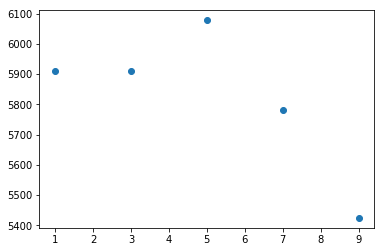

In [16]:
plt.scatter(x = [1,3,5,7,9], y = knn_train_test_updated(cars.columns[1], 'price', [1,3,5,7,9], cars))

In [17]:
knn_train_test_updated(cars.columns[1], 'price', [1,3,5,7,9], cars)

[4172.0451622234405,
 6092.973376827821,
 6132.144942616496,
 6286.452983574796,
 6347.705369832772]

In [18]:
cars.columns[0]

'normalized_lossed'

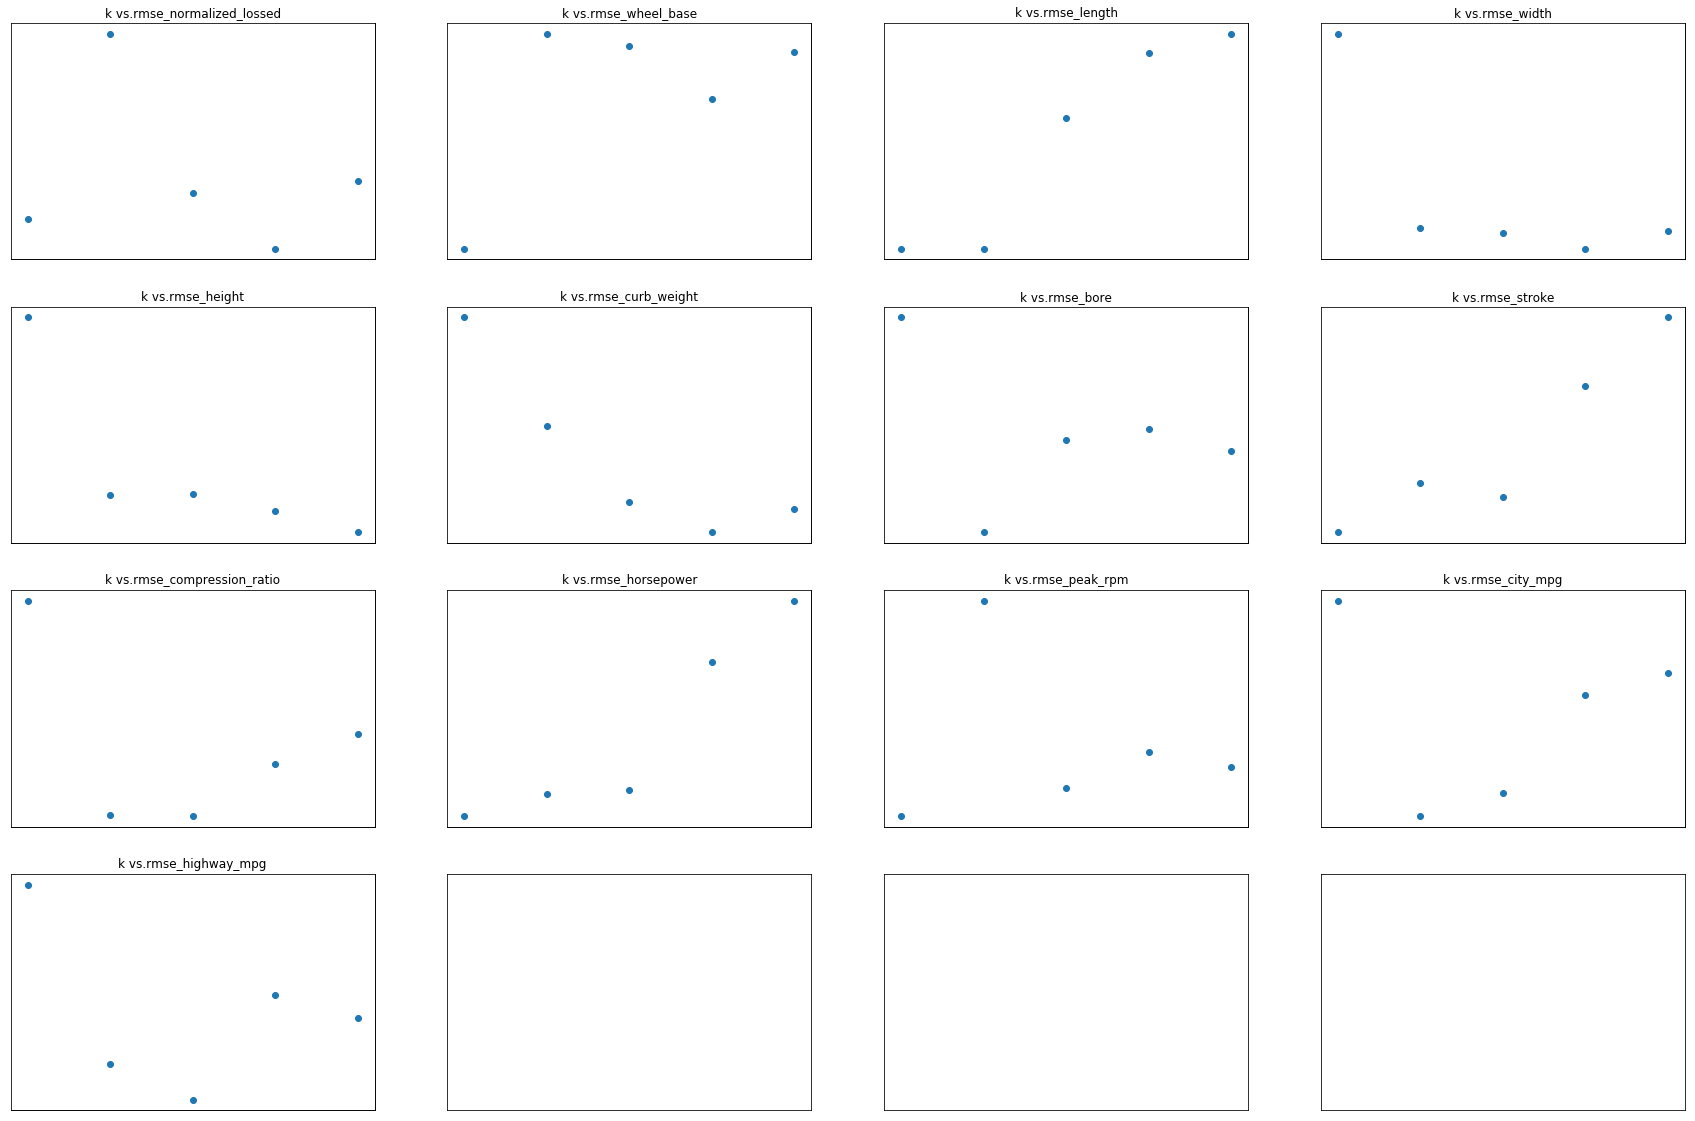

In [19]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (30,20))

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
for i in range(1,14):
    ax = fig.add_subplot(4,4,i)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    ax.scatter(x = [1,3,5,7,9], y = knn_train_test_updated(cars.columns[i-1], 'price', [1,3,5,7,9], cars))
    ax.set_title("k vs." + "rmse_" + str(cars.columns[i-1]))
    
plt.show()

***
### 4) Multivariate Model

+ Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
    + Instead of using just a single column for train and test, use all of the columns passed in.
    + Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
+ Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
+ Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
+ Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
+ Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
+ Display all of the RMSE values.

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def knn_train_test_multi(features_cols, target_col, df):
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    df_new = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(df_new) / 2)
    
    # First half = training set and second half = test set
    train_df = df_new.iloc[0:last_train_row]
    test_df  = df_new.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
    knn.fit(train_df[features_cols], train_df[target_col])
    y_pred_test = knn.predict(test_df[features_cols])
    predictions = np.sqrt(mean_squared_error(y_true = test_df[target_col], y_pred = y_pred_test))
    return(predictions)

#### 4.1. Use all the features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [21]:
num_cols

['normalized_lossed',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [22]:
all_features = ['normalized_lossed', 'wheel_base', 'length','width','height', 'curb_weight','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']

print("The RMSE value for the KNN multivariate model with all features and the default k value is:", knn_train_test_multi(all_features, 'price', cars))

The RMSE value for the KNN multivariate model with all features and the default k value is: 4087.1361776940817


#### 4.2. Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [23]:
best_two_features = ['curb_weight', 'stroke']
print("The RMSE value for the KNN multivariate model with the two best features and the default k value is:", knn_train_test_multi(best_two_features, 'price', cars))

The RMSE value for the KNN multivariate model with the two best features and the default k value is: 4005.7574118123816


#### 4.3. Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [24]:
best_three_features = ['curb_weight', 'stroke', 'horsepower']
print("The RMSE value for the KNN multivariate model with the three best features and the default k value is:", knn_train_test_multi(best_three_features, 'price', cars))

The RMSE value for the KNN multivariate model with the three best features and the default k value is: 4180.012487438331


#### 4.4. Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [25]:
best_four_features = ['curb_weight', 'stroke', 'horsepower', 'highway_mpg']
print("The RMSE value for the KNN multivariate model with the four best features and the default k value is:", knn_train_test_multi(best_four_features, 'price', cars))

The RMSE value for the KNN multivariate model with the four best features and the default k value is: 4303.929480160872


#### 4.5 Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [26]:
best_five_features = ['curb_weight', 'stroke', 'horsepower', 'highway_mpg', 'width']
print("The RMSE value for the KNN multivariate model with the five best features and the default k value is:", knn_train_test_multi(best_five_features, 'price', cars))

The RMSE value for the KNN multivariate model with the five best features and the default k value is: 3791.204292572446


***
### 5) Hyperparameter Tuning

+ For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
+ Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [27]:
def knn_train_test_multi_updated(features_cols, target_col, k_list, df):
    # shuffle index
    shuffled_index = np.random.permutation(df.index)
    df_new = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(df_new) / 2)
    
    # First half = training set and second half = test set
    train_df = df_new.iloc[0:last_train_row]
    test_df  = df_new.iloc[last_train_row:]
    
    predictions_list = []
    for i in range(0,25):
        knn = KNeighborsRegressor(n_neighbors = k_list[i], algorithm = 'brute')
        knn.fit(train_df[features_cols], train_df[target_col])
        y_pred_test = knn.predict(test_df[features_cols])
        predictions = np.sqrt(mean_squared_error(y_true = test_df[target_col], y_pred = y_pred_test))
        predictions_list.append(predictions)
    return(predictions_list)

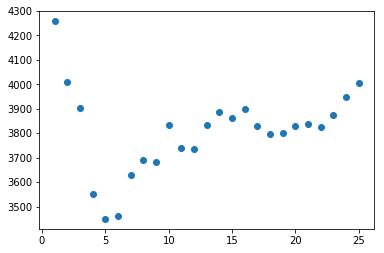

In [28]:
rmse_four_features = knn_train_test_multi_updated(best_four_features, 'price', list(range(1,26)), cars)

plt.scatter(x = list(range(1,26)), y = rmse_four_features) # optimal k: k = 1

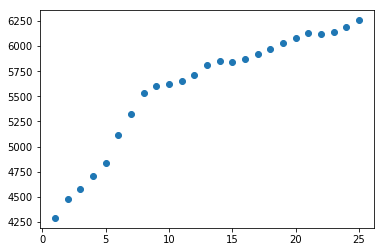

In [29]:
rmse_five_features = knn_train_test_multi_updated(best_five_features, 'price', list(range(1,26)), cars)

plt.scatter(x = list(range(1,26)), y = rmse_five_features) # optimal k: k = 2

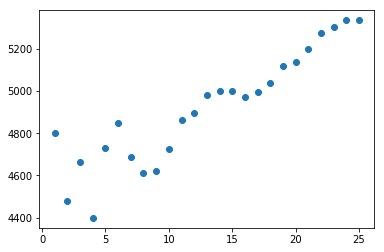

In [30]:
rmse_two_features = knn_train_test_multi_updated(best_two_features, 'price', list(range(1,26)), cars)

plt.scatter(x = list(range(1,26)), y = rmse_two_features) # optimal k: k = 1